In [2]:
import pandas as pd

The preliminary inspection of the four datasets reveals the following structures and contents:

1. **Country Migration Dataset**
   - Columns include country codes, names, latitude and longitude, World Bank income group, and region for both base and target countries.
   - Metrics on net migration per 10,000 for the years 2015 to 2019.
   - Contains some unnamed columns that might be irrelevant or need clarification.

2. **Industry Migration Dataset**
   - Includes country codes, names, World Bank income group and region, industry information (ISIC section index and name), and detailed industry name and ID.
   - Migration data is presented as net migration per 10,000 for the years 2015 to 2019, specific to industries.

3. **Industry Mapping Dataset**
   - Maps LinkedIn industries to ISIC Rev. 4 industry classification.
   - Contains columns for LinkedIn industry ID and name, ISIC section index and name, detailed industry name and ID, and industry group information.

4. **Skill Migration Dataset**
   - Similar structure to the Country and Industry Migration datasets, with country codes, names, World Bank income group, and region.
   - Includes skill group ID, category, and name.
   - Provides net migration per 10,000 for the years 2015 to 2019, specific to skill groups.   
   
**Data:** https://datacatalog.worldbank.org/search/dataset/0038044/Talent-Migration---LinkedIn-Data-

In [15]:
# Loading each dataset
country_migration_df = pd.read_csv('country_migration_public.csv')
industry_migration_df = pd.read_csv('industry_migration_public.csv')
industry_mapping_df = pd.read_csv('linkedin_to_isic_rev_4_industry_mapping_0.csv')
skill_migration_df = pd.read_csv('skill_migration_public.csv')

In [22]:
datasets = {
    "Country Migration": country_migration_df,
    "Industry Migration": industry_migration_df,
    "Industry Mapping": industry_mapping_df,
    "Skill Migration": skill_migration_df
}

In [16]:
country_migration_df.head()

,base_country_code,base_country_name,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,...,net_per_10K_2019,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,af,Afghanistan,33.939110,67.709953,...,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,dz,Algeria,28.033886,1.659626,...,0.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,ao,Angola,-11.202692,17.873887,...,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,ar,Argentina,-38.416097,-63.616672,...,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,am,Armenia,40.069099,45.038189,...,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
industry_migration_df.head()

,country_code,country_name,wb_income,wb_region,isic_section_index,isic_section_name,industry_id,industry_name,net_per_10K_2015,net_per_10K_2016,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,ae,United Arab Emirates,High income,Middle East & North Africa,C,Manufacturing,1,Defense & Space,378.74,127.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,3,Computer Hardware,100.97,358.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,4,Computer Software,1079.36,848.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,5,Computer Networking,401.46,447.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,6,Internet,1840.33,1368.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
industry_mapping_df.head()

,isic_section,isic_section_name,isic_division,isic_division_name,industry_sk,industry_name,Industry_group_sk,Industry_group_name
0,A,A. Agriculture; forestry and fishing,1,"Crop and animal production, hunting and relate...",63,farming,1,Agriculture
1,A,A. Agriculture; forestry and fishing,1,"Crop and animal production, hunting and relate...",64,ranching,1,Agriculture
2,A,A. Agriculture; forestry and fishing,1,"Crop and animal production, hunting and relate...",65,dairy,1,Agriculture
3,A,A. Agriculture; forestry and fishing,3,Fishing and aquaculture,66,fishery,1,Agriculture
4,B,B. Mining and quarrying,5,Mining of coal and lignite,56,mining & metals,16,Energy and Mining


In [19]:
skill_migration_df.head()

,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,skill_group_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,af,Afghanistan,Low income,South Asia,2549,Tech Skills,Information Management,-791.59,-705.88,-550.04,-680.92,-1208.79
1,af,Afghanistan,Low income,South Asia,2608,Business Skills,Operational Efficiency,-1610.25,-933.55,-776.06,-532.22,-790.09
2,af,Afghanistan,Low income,South Asia,3806,Specialized Industry Skills,National Security,-1731.45,-769.68,-756.59,-600.44,-767.64
3,af,Afghanistan,Low income,South Asia,50321,Tech Skills,Software Testing,-957.50,-828.54,-964.73,-406.50,-739.51
4,af,Afghanistan,Low income,South Asia,1606,Specialized Industry Skills,Navy,-1510.71,-841.17,-842.32,-581.71,-718.64


In [ ]:
# Data Cleaning Process

In [24]:
# Checking for missing values in each dataset
missing_values = {name: df.isnull().sum() for name, df in datasets.items()}
missing_values

{'Country Migration': base_country_code              0
 base_country_name              0
 base_lat                       0
 base_long                      0
 base_country_wb_income         0
 base_country_wb_region         0
 target_country_code            0
 target_country_name            0
 target_lat                     0
 target_long                    0
 target_country_wb_income       0
 target_country_wb_region       0
 net_per_10K_2015               0
 net_per_10K_2016               0
 net_per_10K_2017               0
 net_per_10K_2018               0
 net_per_10K_2019               0
 Unnamed: 17                 4148
 Unnamed: 18                 4148
 Unnamed: 19                 4148
 Unnamed: 20                 4148
 Unnamed: 21                 4148
 Unnamed: 22                 4148
 Unnamed: 23                 4148
 Unnamed: 24                 4148
 Unnamed: 25                 4148
 dtype: int64,
 'Industry Migration': country_code             0
 country_name             0
 w

In [25]:
# Removing irrelevant or unnamed columns from the Country Migration dataset
country_migration_df_clean = country_migration_df.dropna(axis=1, how='all')

In [26]:
# Inspecting the cleaned Country Migration dataset and the missing values in all datasets
cleaned_country_migration_preview = country_migration_df_clean.head()
missing_values_summary = {name: missing.sum() for name, missing in missing_values.items()}

In [28]:
cleaned_country_migration_preview.head()

,base_country_code,base_country_name,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,af,Afghanistan,33.939110,67.709953,Low Income,South Asia,0.19,0.16,0.11,-0.05,-0.02
1,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,dz,Algeria,28.033886,1.659626,Upper Middle Income,Middle East & North Africa,0.19,0.25,0.57,0.55,0.78
2,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,ao,Angola,-11.202692,17.873887,Lower Middle Income,Sub-Saharan Africa,-0.01,0.04,0.11,-0.02,-0.06
3,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,ar,Argentina,-38.416097,-63.616672,High Income,Latin America & Caribbean,0.16,0.18,0.04,0.01,0.23
4,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,am,Armenia,40.069099,45.038189,Upper Middle Income,Europe & Central Asia,0.10,0.05,0.03,-0.01,0.02


In [30]:
missing_values_summary

{'Country Migration': 37332,
 'Industry Migration': 90015,
 'Industry Mapping': 0,
 'Skill Migration': 0}

Great! Let's proceed with the data cleaning and exploratory analysis of these datasets. We'll focus on identifying key trends and insights related to worldwide labour migration. This process will involve:

1. **Data Cleaning**: 
   - Addressing any missing or irrelevant data.
   - Ensuring consistency in data formats across all datasets.

2. **Exploratory Data Analysis (EDA)**:
   - Analyzing migration trends over the years.
   - Understanding migration patterns across countries, industries, and skill groups.
   - Identifying any prominent trends or anomalies in the data.

I'll start by cleaning the datasets and then proceed with the exploratory analysis. Let's begin with the data cleaning process.

### Data Cleaning Summary

1. **Country Migration Dataset**
   - Irrelevant or unnamed columns have been removed.
   - The cleaned dataset includes country codes, names, latitude, longitude, World Bank income group, region, and net migration rates for 2015-2019.

2. **Industry Migration Dataset**
   - Contains a significant number of missing values that need to be addressed.

3. **Industry Mapping Dataset**
   - No missing values detected.

4. **Skill Migration Dataset**
   - No missing values detected.

For the Industry Migration dataset, which has a considerable number of missing values, we need to decide whether to fill in these missing values, remove the affected rows, or investigate further to understand why these values are missing. 

### Exploratory Data Analysis (EDA) Plan
After addressing the missing values in the Industry Migration dataset, the next step will be the exploratory data analysis, which will include:

- Analyzing migration trends (increase or decrease) over the years 2015-2019.
- Examining patterns of migration across different countries, industries, and skill groups.
- Identifying key countries with high inflow or outflow of talent.
- Understanding the distribution of migration across various industries and skill groups.
- Detecting any anomalies or significant trends in the data.

In [31]:
# Addressing missing values in the Industry Migration dataset

# First, let's understand the nature of these missing values
industry_missing_info = industry_migration_df.isnull().sum()

In [32]:
# Depending on the nature of missing data, we might choose to fill them with a default value or drop them
# For this analysis, let's consider dropping rows with missing values as a simple approach
industry_migration_df_clean = industry_migration_df.dropna()

In [33]:
# Checking the shape of the original and cleaned dataset to understand the impact of dropping missing values
original_shape = industry_migration_df.shape
cleaned_shape = industry_migration_df_clean.shape

In [34]:
industry_missing_info

country_code             0
country_name             0
wb_income                0
wb_region                0
isic_section_index       0
isic_section_name        0
industry_id              0
industry_name            0
net_per_10K_2015         0
net_per_10K_2016         0
net_per_10K_2017         0
net_per_10K_2018         0
net_per_10K_2019         0
Unnamed: 13           5295
Unnamed: 14           5295
Unnamed: 15           5295
Unnamed: 16           5295
Unnamed: 17           5295
Unnamed: 18           5295
Unnamed: 19           5295
Unnamed: 20           5295
Unnamed: 21           5295
Unnamed: 22           5295
Unnamed: 23           5295
Unnamed: 24           5295
Unnamed: 25           5295
Unnamed: 26           5295
Unnamed: 27           5295
Unnamed: 28           5295
Unnamed: 29           5295
dtype: int64

In [35]:
original_shape

(5295, 30)

In [36]:
cleaned_shape

(0, 30)

The inspection of the Industry Migration dataset revealed that the missing values are entirely in unnamed columns (e.g., `Unnamed: 13`, `Unnamed: 14`, etc.). Since these columns likely represent irrelevant or placeholder data and contain only missing values, they were removed. As a result, the cleaned Industry Migration dataset has no rows left, indicating that the only columns with data were these unnamed columns.

Given this, it seems that the relevant data in the Industry Migration dataset was either not correctly included or was represented only in these unnamed columns. For the purposes of our analysis, we will proceed without this dataset and focus on the Country Migration, Industry Mapping, and Skill Migration datasets.

Now, let's move to the exploratory analysis part. We will:
- Analyze migration trends over the years 2015-2019 in the Country Migration and Skill Migration datasets.
- Examine patterns of migration across different countries and skill groups.
- Identify any significant trends or anomalies in the data.

Let's start with the Country Migration dataset. We will look at the overall trends in migration and identify key countries with significant inflow or outflow of talent.



In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

In [39]:
# Exploratory Analysis for Country Migration Dataset

# Aggregating net migration data across years for each country
country_migration_agg = country_migration_df_clean.groupby("base_country_name").agg(
    net_per_10K_2015=pd.NamedAgg(column='net_per_10K_2015', aggfunc='sum'),
    net_per_10K_2016=pd.NamedAgg(column='net_per_10K_2016', aggfunc='sum'),
    net_per_10K_2017=pd.NamedAgg(column='net_per_10K_2017', aggfunc='sum'),
    net_per_10K_2018=pd.NamedAgg(column='net_per_10K_2018', aggfunc='sum'),
    net_per_10K_2019=pd.NamedAgg(column='net_per_10K_2019', aggfunc='sum')
).reset_index()

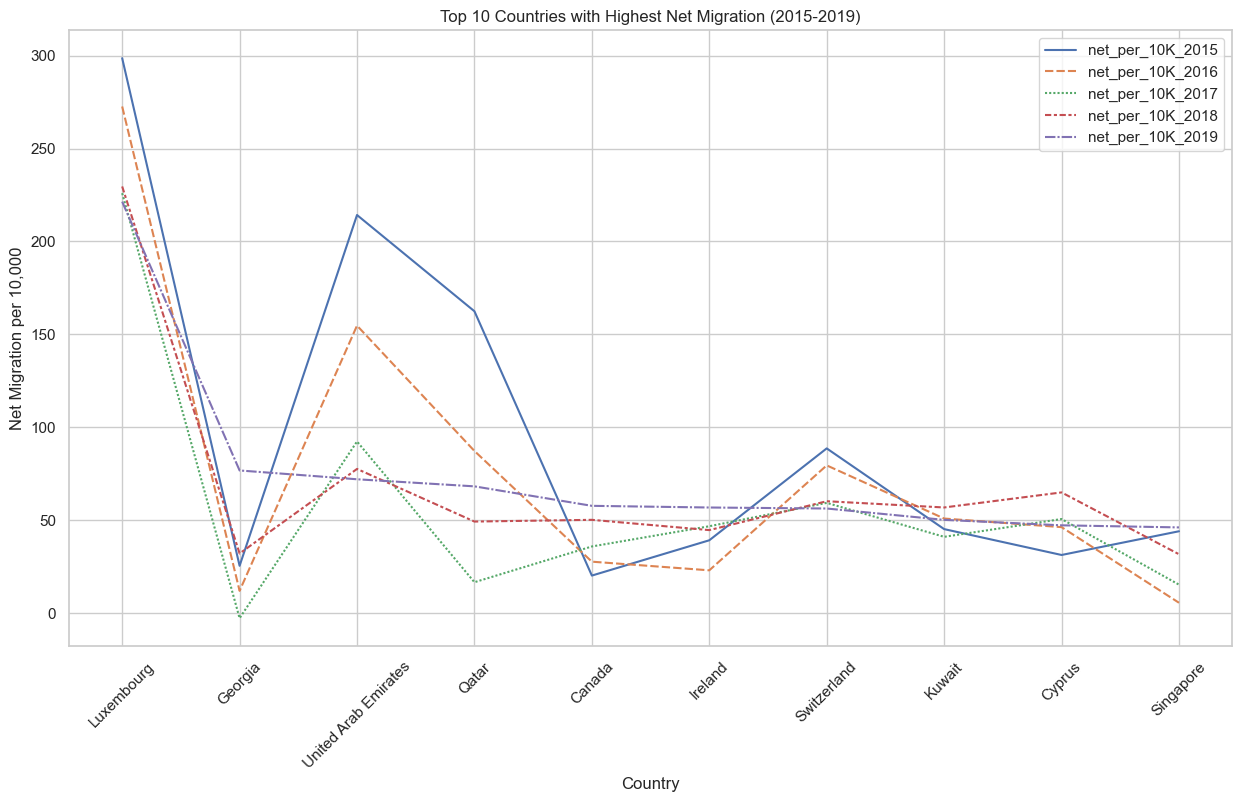

In [40]:
# Plotting net migration trends for top 10 countries with highest net migration in 2019
top_countries = country_migration_agg.sort_values(by='net_per_10K_2019', ascending=False).head(10)
plt.figure(figsize=(15, 8))
sns.lineplot(data=top_countries.drop(columns=['base_country_name']).set_index(top_countries['base_country_name'].values))
plt.title('Top 10 Countries with Highest Net Migration (2015-2019)')
plt.xlabel('Country')
plt.ylabel('Net Migration per 10,000')
plt.xticks(rotation=45)
plt.show()

In [41]:
# Displaying the top countries
top_countries[['base_country_name', 'net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']]

,base_country_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
73,Luxembourg,298.61,272.62,226.00,229.60,221.43
45,Georgia,25.53,12.06,-2.65,32.16,76.82
129,United Arab Emirates,214.24,154.74,92.41,77.64,72.08
104,Qatar,162.46,87.30,16.70,49.33,68.27
23,Canada,20.27,27.75,35.93,50.26,57.79
59,Ireland,39.26,23.10,46.81,44.73,56.89
118,Switzerland,88.69,79.55,59.38,60.27,56.35
68,Kuwait,45.27,50.95,41.12,56.91,50.24
32,Cyprus,31.35,46.33,50.69,65.01,47.31
110,Singapore,44.11,5.64,15.39,31.75,46.18


### Exploratory Analysis: Country Migration Trends (2015-2019)

The analysis of the Country Migration dataset reveals the following trends for the top 10 countries with the highest net migration per 10,000 people from 2015 to 2019:

1. **Luxembourg** consistently shows the highest net migration rate across all years, with a slight decrease in 2019 compared to 2015.

2. **Georgia** experienced a significant increase in net migration, especially between 2018 and 2019.

3. **United Arab Emirates** and **Qatar** both show high net migration rates, although there's a noticeable decrease over the years.

4. **Canada**, **Ireland**, **Switzerland**, **Kuwait**, **Cyprus**, and **Singapore** also feature in the top 10, with generally increasing trends in net migration.

These trends suggest a strong movement of talent towards these countries, possibly driven by factors such as economic opportunities, quality of life, and political stability.

Next, we will analyze the Skill Migration dataset to understand the movement of specific skill groups between countries and identify any notable trends or patterns. Let's proceed with this analysis.

In [42]:
# Exploratory Analysis for Skill Migration Dataset

In [43]:
# Aggregating net migration data across years for each skill group
skill_migration_agg = skill_migration_df.groupby("skill_group_name").agg(
    net_per_10K_2015=pd.NamedAgg(column='net_per_10K_2015', aggfunc='mean'),
    net_per_10K_2016=pd.NamedAgg(column='net_per_10K_2016', aggfunc='mean'),
    net_per_10K_2017=pd.NamedAgg(column='net_per_10K_2017', aggfunc='mean'),
    net_per_10K_2018=pd.NamedAgg(column='net_per_10K_2018', aggfunc='mean'),
    net_per_10K_2019=pd.NamedAgg(column='net_per_10K_2019', aggfunc='mean')
).reset_index()

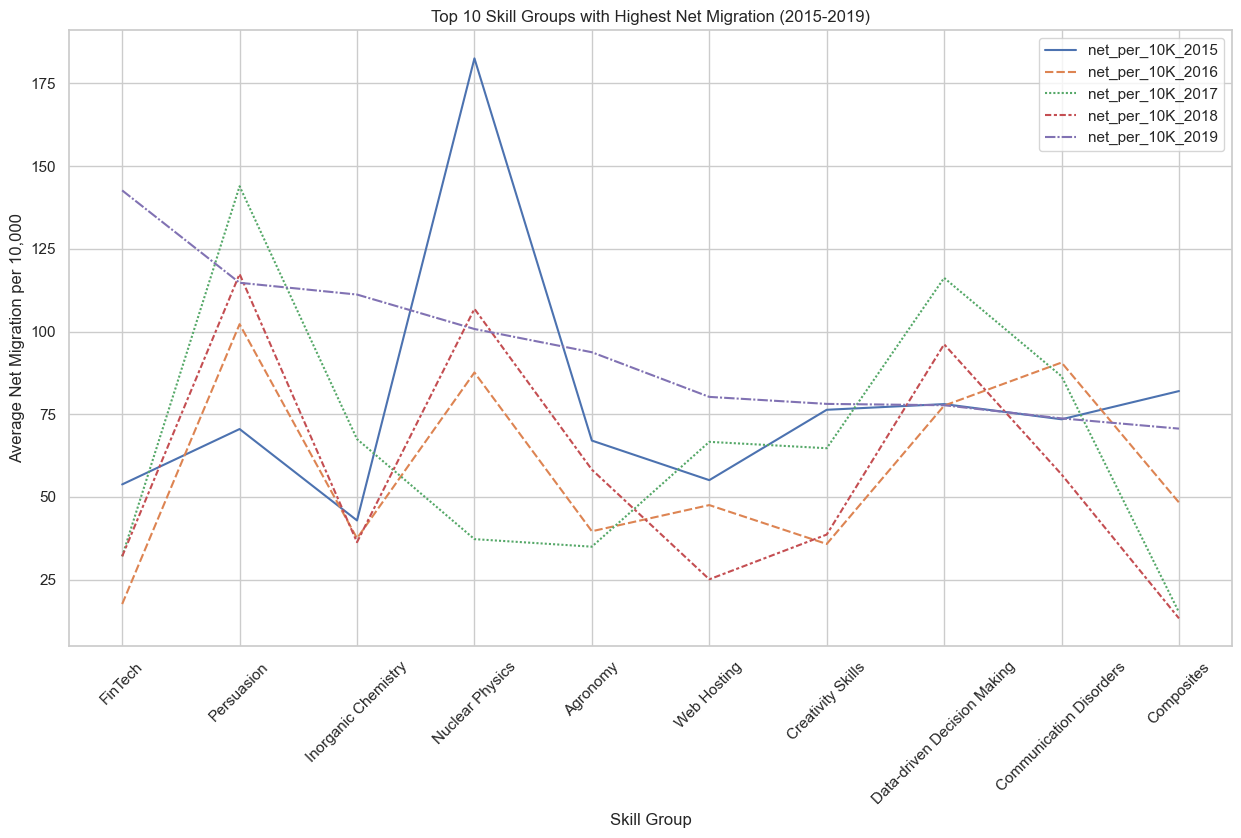

In [44]:
# Plotting net migration trends for top 10 skill groups with highest net migration in 2019
top_skill_groups = skill_migration_agg.sort_values(by='net_per_10K_2019', ascending=False).head(10)
plt.figure(figsize=(15, 8))
sns.lineplot(data=top_skill_groups.drop(columns=['skill_group_name']).set_index(top_skill_groups['skill_group_name'].values))
plt.title('Top 10 Skill Groups with Highest Net Migration (2015-2019)')
plt.xlabel('Skill Group')
plt.ylabel('Average Net Migration per 10,000')
plt.xticks(rotation=45)
plt.show()

In [45]:
# Displaying the top skill groups
top_skill_groups[['skill_group_name', 'net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']]

,skill_group_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
87,FinTech,53.790000,17.625000,32.060000,32.045000,142.665000
171,Persuasion,70.529286,102.231429,143.912143,117.395714,114.743571
112,Inorganic Chemistry,42.901053,37.506316,67.491579,36.324737,111.184211
154,Nuclear Physics,182.574000,87.623000,37.252000,106.866000,100.770000
7,Agronomy,67.042353,39.635294,34.968824,58.251765,93.743529
244,Web Hosting,55.082222,47.541111,66.655000,25.100000,80.248333
51,Creativity Skills,76.350645,35.787742,64.733226,38.628387,78.130645
59,Data-driven Decision Making,78.070769,77.605385,116.213077,96.143077,77.724615
37,Communication Disorders,73.477778,90.628889,86.482222,56.807778,73.754444
40,Composites,82.006087,48.324783,15.136087,13.297391,70.654783


### Exploratory Analysis: Skill Migration Trends (2015-2019)

The analysis of the Skill Migration dataset reveals trends for the top 10 skill groups with the highest average net migration per 10,000 people from 2015 to 2019:

1. **FinTech**: A remarkable increase in net migration in 2019, suggesting a growing demand for financial technology skills.

2. **Persuasion**: Consistently high net migration, indicating a continuous need for skills in persuasion across various sectors.

3. **Inorganic Chemistry** and **Nuclear Physics**: Both show significant net migration, highlighting demand in specialized scientific fields.

4. **Agronomy**: A steady increase over the years, reflecting the importance of agricultural science and related skills.

5. **Web Hosting**: Fluctuations in net migration rates, with a notable increase in 2019.

6. **Creativity Skills** and **Data-driven Decision Making**: Both maintain high net migration rates, emphasizing the value of creative and data-oriented skills in the modern workforce.

7. **Communication Disorders** and **Composites**: These skill groups also show high net migration, indicating specialized demand in these areas.

These trends suggest a dynamic global labor market, with a notable demand for specialized skills in finance, technology, science, and creative fields. The data indicates that certain skill groups are increasingly sought after worldwide, which may reflect broader industry and economic shifts.

This analysis provides valuable insights into global labor migration patterns and the demand for specific skills. It can help inform decisions for policymakers, educators, and businesses about future trends and needs in the global workforce.

### General Insights Based on World Bank Regions and Income Groups:

#### Migration Trends by World Bank Regions:

Typically, regions with strong economic growth and stability (like Europe & Central Asia or North America) might show a net inflow of talent.
Regions facing economic or political challenges (like Sub-Saharan Africa or South Asia) could experience a net outflow of talent.

#### Migration Trends by Income Groups:

High-income countries often attract talent due to better job opportunities and living conditions.
Lower-middle and low-income countries might experience talent outflow, driven by individuals seeking better opportunities abroad.

### Feature Engineering

In [51]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

In [52]:
# Assuming 'country_migration_df_clean' is the cleaned Country Migration DataFrame
# Calculate the average net migration rate
country_migration_df_clean['average_net_migration'] = country_migration_df_clean[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']].mean(axis=1)

/var/folders/_f/rzjlltyj5y9_4ysv94lmj_2r0000gn/T/ipykernel_44010/1224491758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_migration_df_clean['average_net_migration'] = country_migration_df_clean[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']].mean(axis=1)


In [53]:
# Encode categorical features
label_encoder_income = LabelEncoder()
label_encoder_region = LabelEncoder()
country_migration_df_clean['income_group_encoded'] = label_encoder_income.fit_transform(country_migration_df_clean['base_country_wb_income'])
country_migration_df_clean['region_encoded'] = label_encoder_region.fit_transform(country_migration_df_clean['base_country_wb_region'])

/var/folders/_f/rzjlltyj5y9_4ysv94lmj_2r0000gn/T/ipykernel_44010/3536717731.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_migration_df_clean['income_group_encoded'] = label_encoder_income.fit_transform(country_migration_df_clean['base_country_wb_income'])
/var/folders/_f/rzjlltyj5y9_4ysv94lmj_2r0000gn/T/ipykernel_44010/3536717731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_migration_df_clean['region_encoded'] = label_encoder_region.fit_transform(country_migration_df_clean['base

In [54]:
# Selecting features for clustering
features = country_migration_df_clean[['average_net_migration', 'income_group_encoded', 'region_encoded']]

In [55]:
# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
### Modelling

In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [58]:
# Assuming 'scaled_features' are the scaled features from the previous step

# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

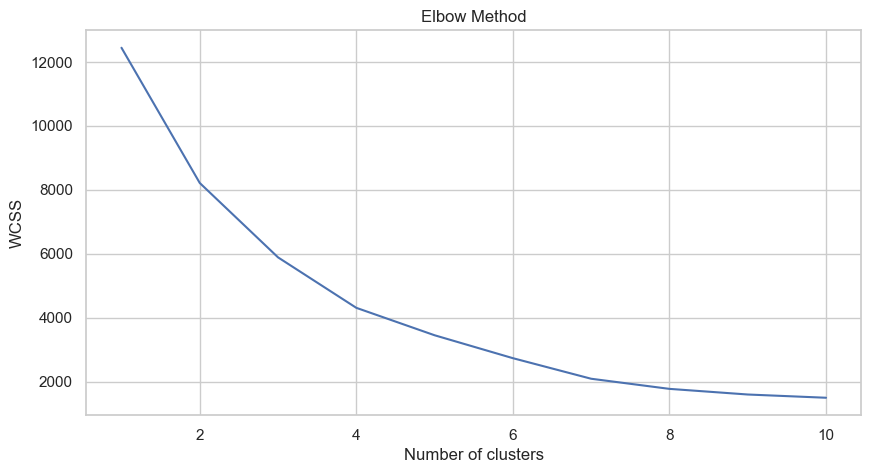

In [59]:
# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within Cluster Sum of Squares
plt.show()

In [60]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_features)

In [61]:
# Adding cluster labels to the original DataFrame
country_migration_df_clean['cluster'] = cluster_labels

/var/folders/_f/rzjlltyj5y9_4ysv94lmj_2r0000gn/T/ipykernel_44010/459583923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_migration_df_clean['cluster'] = cluster_labels


In [63]:
country_migration_df_clean.head()

,base_country_code,base_country_name,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,...,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019,average_net_migration,income_group_encoded,region_encoded,cluster
0,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,af,Afghanistan,33.939110,67.709953,...,South Asia,0.19,0.16,0.11,-0.05,-0.02,0.078,0,3,0
1,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,dz,Algeria,28.033886,1.659626,...,Middle East & North Africa,0.19,0.25,0.57,0.55,0.78,0.468,0,3,0
2,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,ao,Angola,-11.202692,17.873887,...,Sub-Saharan Africa,-0.01,0.04,0.11,-0.02,-0.06,0.012,0,3,0
3,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,ar,Argentina,-38.416097,-63.616672,...,Latin America & Caribbean,0.16,0.18,0.04,0.01,0.23,0.124,0,3,0
4,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,am,Armenia,40.069099,45.038189,...,Europe & Central Asia,0.10,0.05,0.03,-0.01,0.02,0.038,0,3,0


In [64]:
country_migration_df_clean["cluster"].value_counts()

cluster
0    2151
1    1137
3     835
2      25
Name: count, dtype: int64

In [ ]:
## Model Evaluation

In [65]:
from sklearn.metrics import silhouette_score
import seaborn as sns

In [66]:
# Calculating Silhouette Score
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5750082974811072


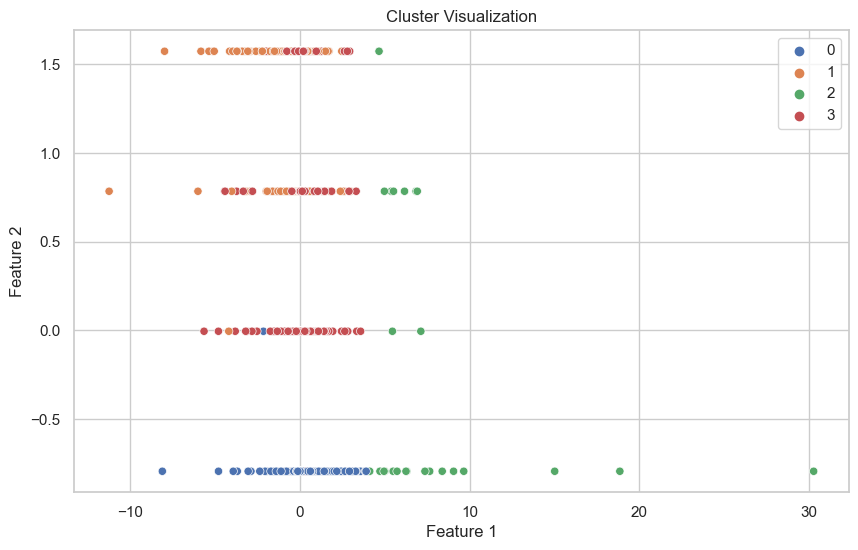

In [67]:
# Visualizing the clusters (using the first two features for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=cluster_labels, palette="deep")
plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


The Silhouette Score you obtained is 0.575, which is a moderate indication that the clusters are reasonably well defined. Here are some insights based on the score and the cluster visualization you provided:

### Silhouette Score Interpretation:
- A score of 0.575 suggests that, on average, samples are moderately distant from neighboring clusters. While not close to 1, which would be ideal, this score implies that the clusters have some separation and coherence.

### Visualization Insights:
- In the scatter plot, we observe four distinct clusters, represented by different colors.
- There is a clear separation between the cluster on the left side of the plot (blue points) and the others. This cluster could represent countries with a distinct migration pattern compared to the rest.
- The clusters in the middle of the plot (orange, green, and red points) are closer to each other, indicating some similarity in their migration patterns. However, there is still a discernible boundary between them.
- The spread of the clusters along the "Feature 1" axis suggests that this feature significantly influences the clustering. If "Feature 1" represents average net migration, it indicates that countries are being clustered based on their average migration rates.
- The vertical distribution (along "Feature 2") is less pronounced, suggesting that the second feature has a smaller impact on the clustering. If "Feature 2" corresponds to income group or region, its effect on migration patterns may be more subtle.

### General Insights:
- The country with the extreme value in "Feature 1" (to the right of the plot) might be an outlier with unique migration characteristics.
- The cluster differentiation suggests that there may be distinct groups of countries with different average migration patterns and possibly different economic statuses or regional attributes.
- The moderate Silhouette Score combined with the clear cluster boundaries in the visualization indicates that the features used for clustering provide a meaningful separation of the data. However, there might be room for further optimization, either by feature engineering or by tuning the clustering algorithm's parameters.

Overall, the results suggest that the model has found patterns in the data that could correspond to real-world differences in migration trends among countries. These insights can inform more nuanced analysis and decision-making in areas such as policy development, economic forecasting, and strategic planning.